# Feature Engineering Assingment

##### using titanic dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

df = pd.read_csv("titanic.csv")
print(df)
rows, cols = df.shape
# Checking for missing values in given data
print(df.isnull().sum())
#     df= df.dropna()
# else:
#     df['Age'].fillna(df['Age'].mean(), inplace=True)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
# Handling missing values


# filling missing age values with median rather tha mean to match with max age-group.
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'] = df['Cabin'].fillna('Unknown')

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\amank\AppData\Local\Temp\ipykernel_11328\1395386748.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\amank\AppData\Local\Temp\ipykernel_11328\1395386748.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [4]:
# Feature Scaling

# Columns to exclude from scaling
exclude_cols = ['Cabin', 'Name', 'Ticket', 'Sex','Embarked']  # Non-numeric columns

# Select columns to scale
columns_to_scale = [col for col in df.columns if col not in exclude_cols]

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling only to selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

encoder = LabelEncoder()
# Apply encoding
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df['Sex'] = encoder.fit_transform(df['Sex'])
# Apply encoding
# df['Size_encoded'] = encoder.fit_transform(df['Size'])
print(df)

     PassengerId  Survived  Pclass  \
0       0.000000       0.0     1.0   
1       0.001124       1.0     0.0   
2       0.002247       1.0     1.0   
3       0.003371       1.0     0.0   
4       0.004494       0.0     1.0   
..           ...       ...     ...   
886     0.995506       0.0     0.5   
887     0.996629       1.0     0.0   
888     0.997753       0.0     1.0   
889     0.998876       1.0     0.0   
890     1.000000       0.0     1.0   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  0.271174  0.125   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.472229  0.125   
2                               Heikkinen, Miss. Laina    0  0.321438  0.000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.434531  0.125   
4                             Allen, Mr. William Henry    1  0.434531  0.000   
..                                                 ...  ...    

In [5]:
columns_to_scale.append('Sex')
columns_to_scale.append('Embarked')
# Compute IQR for numerical columns
Q1 = df[columns_to_scale].quantile(0.25)
Q3 = df[columns_to_scale].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[~((df[columns_to_scale] < lower_bound) | (df[columns_to_scale] > upper_bound)).any(axis=1)]

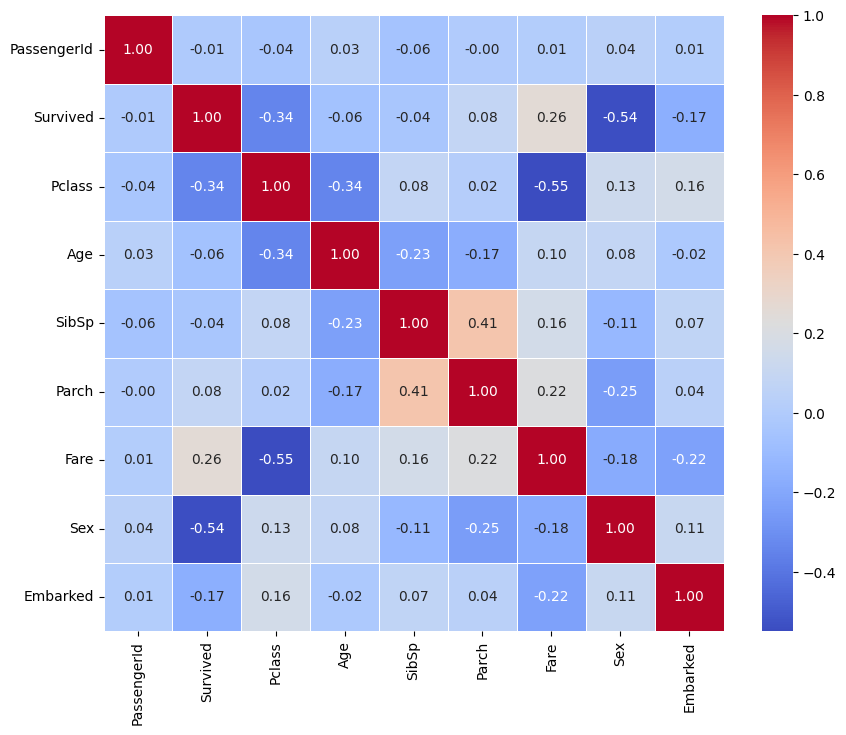

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df[columns_to_scale].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

# Drop highly correlated features (e.g., correlation > 0.9)
corr_threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > corr_threshold)]
print(to_drop)

In [7]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2


# Convert categorical to numerical using one-hot encoding
df_encoded = pd.get_dummies(df.drop('Survived', axis=1))

# Apply Chi-Square Test
X = df_encoded  # Features
y = df['Survived']  # Target variable

chi2_selector = SelectKBest(chi2, k=6)  # Select the best 1 feature
X_new = chi2_selector.fit_transform(X, y)

# Selected Features
selected_features = X.columns[chi2_selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Pclass', 'Sex', 'Fare', 'Embarked', 'Cabin_B96 B98', 'Cabin_Unknown'], dtype='object')


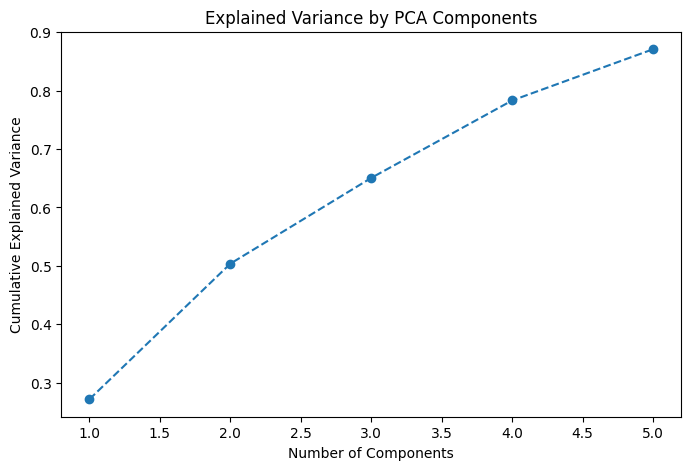

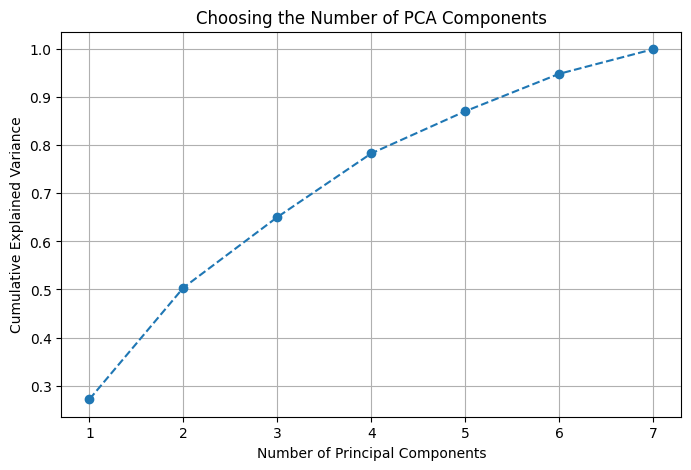

Optimal number of components: 7


PCA(n_components=np.int64(7))

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("titanic.csv")  # Replace with actual dataset path
df.head()
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['median_house_value'], errors='ignore')  # Drop target if applicable

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can also use "median" or "most_frequent"
scaled_data = imputer.fit_transform(scaled_data)
# manually 
from sklearn.decomposition import PCA

# Choose the number of components
pca = PCA(n_components=5)  # Adjust based on variance explained
pca_features = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(5)])


import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()
# automate the n component

from sklearn.decomposition import PCA
import numpy as np

# Apply PCA without specifying components (to analyze all)
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative variance explained
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.grid()
plt.show()
# Find the number of components that explain at least 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

# most standard case is 95% variance.

pca = PCA(n_components=optimal_components)
pca